In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from functools import reduce
import plotly.express as px

In [60]:
file_paths = [f for f in glob.glob('../../data/pm_data/*.edf')]
combined_df = combine_dataset(file_paths)
combined_df[['Time']][880:] 

../../data/pm_data/2023-02-08_15-45-44-SPS3x_1837FE6A6AD70C29.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_124BF175470BC117.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_BC5F2E8BD0E9B21D.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_033EBECC09FAA564.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_DA8590A0DD5EC12B.edf


,Time
880,16:00:52
881,16:00:53
882,16:00:54
883,16:00:55
884,16:00:56
...,...
3502,16:45:48
3503,16:45:49
3504,16:45:50
3505,16:45:51


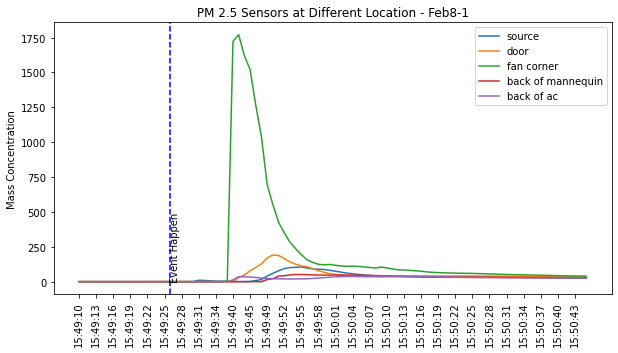

In [115]:
# %load pm_vis.py
import pandas as pd
import matplotlib.pyplot as plt
import glob
from functools import reduce

def combine_dataset(file_paths):    
    data_frames = []
    for _file in file_paths:
        pm_df = pd.read_csv(_file, sep="	", parse_dates=[1])
        pm_df['Local_Date_Time'] = pm_df['Local_Date_Time'].dt.floor('S').dt.tz_localize(None)
        pm_df['Time'] = pm_df['Local_Date_Time'].dt.time.astype(str)
        data_frames.append(pm_df)

    combined_df = reduce(lambda left,right: pd.merge(left,right,on='Local_Date_Time'), data_frames)
    return combined_df


file_paths = [f for f in glob.glob('../../data/pm_data/*.edf')]
combined_df = combine_dataset(file_paths)

'''
time vs pm sensor data
Args: 
if plot_type is "MassConc", PM_size can be choosen from  "1p0" ,"2p5", "4p0", "10p"
if plot_type is "NumbConc", PM_size can be choosen from  "0p5", "1p0", "2p5", "4p0"
'''
def graph(plot_type = "MassConc", PM_size = "2p5", timestamp= 1, interval = 120,event = '15:49:26',  trial = 'Feb8-1'):
    place_mapping = {'680415': 'fan corner', '6f7f19':'back of ac',
                     '620512': 'source','137f63':'door', '110e60':'back of mannequin'}
    sensor_mapping = {'BC5F2E8BD0E9B21D':'680415', 'DA8590A0DD5EC12B':'6f7f19', 
                        '1837FE6A6AD70C29':'620512', '124BF175470BC117':'137f63', '033EBECC09FAA564':'110e60'}
    size = {"0p5": '0.5', "1p0": '1.0', "2p5":'2.5', "4p0":'4.0', "10p": '10.0'}
    concentration = {"MassConc": 'Mass Concentration', "NumbConc": 'Count Concentration'}
    for k in range(1,2):
    # Plot figure
        fig, ax = plt.subplots(figsize=(10,5))
    # Plot
        for i, j in enumerate(['{}_{}_SPS3x_1837FE6A6AD70C29'.format(plot_type, PM_size),
                               '{}_{}_SPS3x_124BF175470BC117'.format(plot_type, PM_size),
                               '{}_{}_SPS3x_BC5F2E8BD0E9B21D'.format(plot_type, PM_size),
                               '{}_{}_SPS3x_033EBECC09FAA564'.format(plot_type, PM_size),
                               '{}_{}_SPS3x_DA8590A0DD5EC12B'.format(plot_type, PM_size)]):
            _ = ax.plot(combined_df['Time'][timestamp:timestamp+interval], combined_df[j][timestamp:timestamp + interval], 
                        label=['source', 'door', 'fan corner', 'back of mannequin','back of ac'][i])
            _ = ax.legend() 
            
        plt.axvline(event, color='b', ls = '--', label = 'Event')
        plt.text(event, 0.5, 'Event Happen', rotation=90,verticalalignment='bottom')
        plt.xticks(rotation=90)
        # add description
        ax.set_title('PM {} Sensors at Different Location - {}'.format(size[PM_size], trial))
        ax.set_xticks(combined_df['Time'][timestamp:timestamp + interval][::3])
        ax.set_ylabel('{}'.format(concentration[plot_type]))
        plt.savefig("PM{}_{}_{}.png".format(size[PM_size], plot_type, trial))
        plt.show()
        
#Feb8-1
graph("MassConc", timestamp=200, interval = 90, event = '15:49:26' , trial = 'Feb8-1')
#Feb8-2
# graph("MassConc", timestamp=405, interval = 90, event = '15:52:53', trial = 'Feb8-2')
# #Feb8-3
# graph("MassConc", timestamp=630, interval = 90, event = '15:56:52', trial = 'Feb8-3')
# #Feb8-4
# graph("MassConc", timestamp=885, interval = 90,  event = '16:01:07', trial = 'Feb8-4')


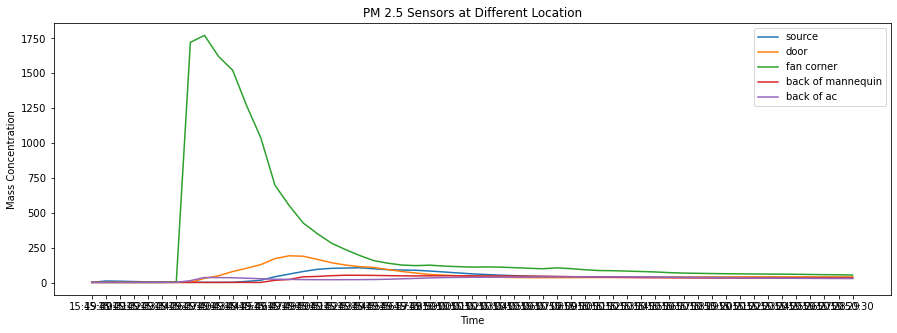

In [5]:
graph()

### Sensors's Location 

In [9]:
d = {'x':[-20, -99, 90, 90, -99 ], 'y': [-5, -90, 90, -90, 85], 'z':[35, 80, 10, 30, 75], 'location': ['source', 'back of mannequin', 'fan corner', 'door', 'back of ac'] }
df = pd.DataFrame(data = d)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='location')
fig.update_layout(title_text='Sensors Location in a Room', title_x= 0.43, width= 750, height = 400)
fig.show()


In [6]:
#fig.write_image("fig1.png")